In [1]:
# import sys
# sys.path.append("./")
import numpy as np
from sklearn.datasets import load_digits, fetch_olivetti_faces
from src.jadeR import jadeR
from picard import Picard
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set the random seed
np.random.seed(0)


In [2]:
def plot_filters(filters, interpolation_method='bicubic'):
    # Number of filters
    n_filters = len(filters)
    
    # Determine the grid size for plotting
    grid_size = int(np.ceil(np.sqrt(n_filters)))
    
    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(3 + grid_size//4, 3 + grid_size//4))
    
    # Flatten axes array to simplify the loop
    axes = axes.flatten()
    
    # Loop over the filters and plot each one
    for i in range(n_filters):
        ax = axes[i]
        # Apply the specified interpolation method
        ax.imshow(filters[i], cmap='gray', interpolation=interpolation_method)
        ax.axis('off')  # Turn off the axis labels and ticks
    
    # Turn off unused subplots
    for j in range(n_filters, len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)

    # plt.tight_layout()
    plt.show()
    

### Conjunto de Dados de Faces Olivetti

O conjunto de dados de Faces Olivetti, também conhecido como "Banco de Dados de Faces da AT&T" ou simplesmente "Banco de Dados ORL de Faces", é um conjunto de dados popular usado no campo da aprendizagem de máquina, particularmente no desenvolvimento e teste de algoritmos para reconhecimento facial. Este conjunto de dados compreende um conjunto de imagens de rosto tiradas entre abril de 1992 e abril de 1994 nos Laboratórios da AT&T em Cambridge. Aqui estão alguns detalhes-chave sobre o conjunto de dados de Faces Olivetti:

#### Composição do Conjunto de Dados:
- **Número de Pessoas**: O conjunto de dados contém 400 imagens em escala de cinza de 40 pessoas distintas. Cada pessoa é representada por 10 imagens diferentes.
- **Variabilidade das Imagens**: As imagens de cada pessoa variam em termos de iluminação, expressões faciais (olhos abertos/fechados, sorrindo/não sorrindo) e detalhes faciais (óculos/sem óculos). As imagens foram tiradas em diferentes momentos, variando a iluminação, as expressões faciais e as configurações faciais.
- **Resolução da Imagem**: Cada imagem tem uma resolução de 64x64 pixels, com 256 níveis de cinza por pixel. As imagens são geralmente apresentadas em uma forma reduzida para facilitar o process

In [3]:
data = fetch_olivetti_faces()

In [4]:
from skimage.measure import block_reduce
ds = 1
X = data["data"]

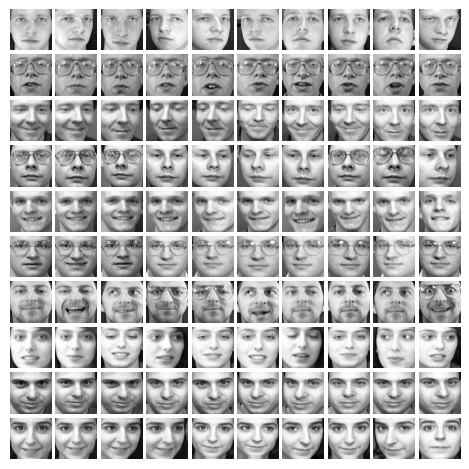

In [5]:
width = height = 64
plot_filters(X[0:100].reshape((-1, width, height)), interpolation_method=None)

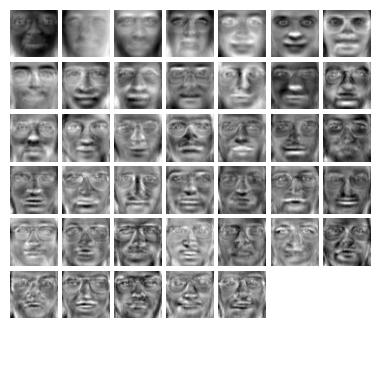

In [6]:
from sklearn.decomposition import FastICA

# perform ICA
pca = PCA(n_components=40)
# ica = Picard(n_components=40, extended=True, ortho=True, random_state=0, fun="logcosh", whiten="unit-variance")
pca.fit(X)
filters = pca.components_

plot_filters(filters.reshape((-1, width, height)), interpolation_method=None)

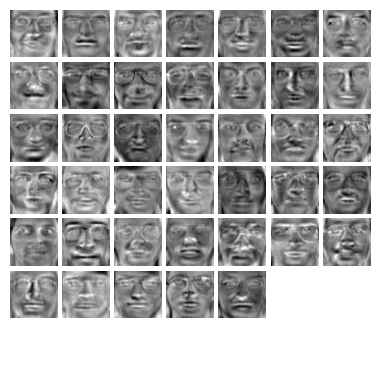

In [7]:
from sklearn.decomposition import FastICA

# perform ICA
ica = FastICA(n_components=40, whiten="unit-variance")
# ica = Picard(n_components=40, extended=True, ortho=True, random_state=0, fun="logcosh", whiten="unit-variance")
ica.fit(X)
filters = ica.components_

plot_filters(filters.reshape((-1, width, height)), interpolation_method=None)

In [8]:
import pandas as pd
df = pd.read_csv("datasets/fashion-mnist_train.csv")

In [9]:
data = df.values[:, 1:].reshape((-1, 28, 28))
X = data.reshape((60000, -1))

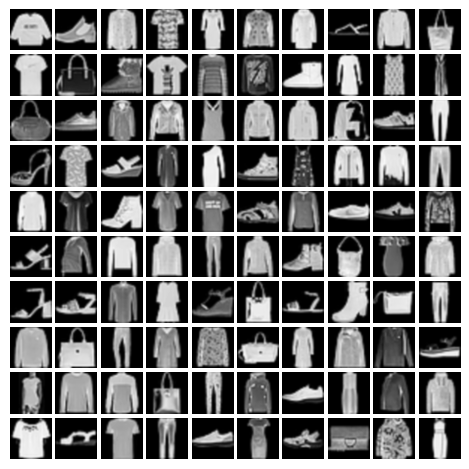

In [10]:
width = height = 28

plot_filters(X[0:100].reshape((-1, 28, 28)))

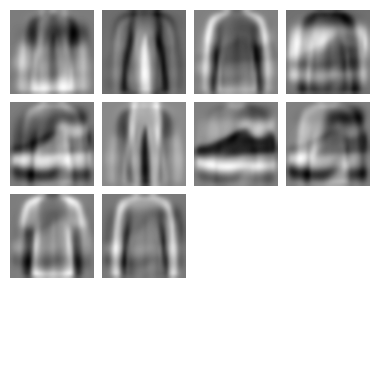

In [11]:
from sklearn.decomposition import FastICA

# perform ICA
# ica = FastICA(n_components=10, whiten="unit-variance")
ica = Picard(n_components=10, extended=True, ortho=True, random_state=0, fun="logcosh", whiten="unit-variance")
ica.fit(X)
filters = ica.components_

plot_filters(filters.reshape((-1, 28, 28)))

### Conjunto de Dados de Patches de Imagens Naturais
O conjunto de dados de patches de imagens de Van Hateren é uma coleção amplamente utilizada na pesquisa de visão computacional, especialmente no estudo de estatísticas de imagens naturais e na modelagem de processos visuais. Este conjunto de dados foi coletado e preparado por Hans van Hateren e seus colaboradores.

Características Principais:
Origem: As imagens originais foram capturadas usando uma câmera especializada para mimetizar a alta resolução e a dinâmica do sistema visual humano. Isso inclui uma gama dinâmica muito ampla e uma resolução espacial alta.

Composição: O conjunto de dados inclui várias imagens de cenas naturais. A partir dessas imagens, pequenos segmentos ou "patches" são extraídos para análise. Esses patches são tipicamente usados para analisar características locais das imagens, como texturas, padrões e outras informações estatísticas relevantes.


Um conjunto de dados de "patches de imagens naturais" tipicamente consiste em pequenos segmentos extraídos de fotografias maiores de cenas naturais. Esses segmentos (ou patches) são geralmente retirados de diversas imagens do mundo natural, incluindo paisagens, plantas, animais e outros elementos, que exibem uma ampla gama de padrões visuais naturais e texturasuimagem.

5. **Plausibilidade Biológica**: Para a neurociência computacional, estudar esses conjuntos de dados ajuda na criação de modelos que imitam a forma como sistemas biológicos processam informações visuais, potencialmente levando a insights sobre a percepção visual hums e confiáveis.


In [12]:
import scipy
import numpy as np

data = scipy.io.loadmat("datasets/NaturalImage.mat")['rawImages'].T
data = np.array(data, dtype=np.double)


In [13]:
data.shape
X = data

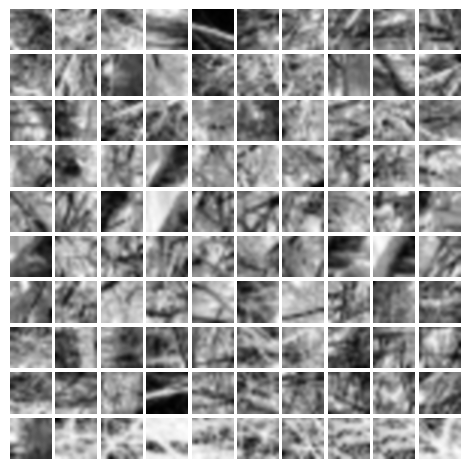

In [14]:
# Specify image width and height for displaying
width = height = 14

pca = PCA(whiten=True)
whitened_data = pca.fit_transform(data)

plot_filters(data.reshape((-1, width, height))[0:100])


### Componentes PCA

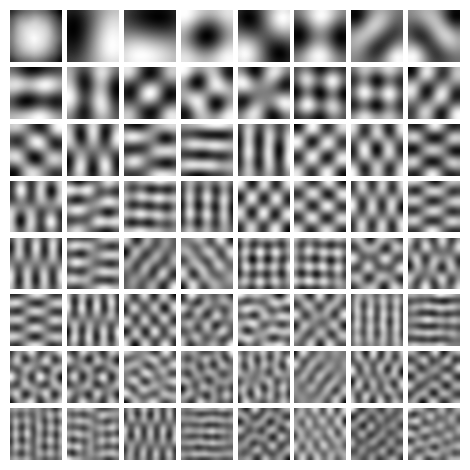

In [15]:
pca = PCA(n_components=64, whiten=True)
whitened_data = pca.fit_transform(data)
filters = pca.components_
plot_filters(filters.reshape((-1, width, height)))

### Aprendendo filtros de Gabor via ICA

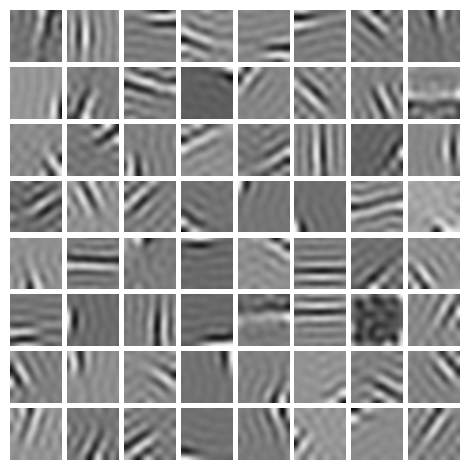

In [16]:
ica = FastICA(n_components=64,whiten="unit-variance")
# ica = Picard(n_components=10, extended=True, ortho=True, random_state=0, fun="logcosh", whiten="unit-variance")

ica.fit(data)
filters = ica.components_

plot_filters(filters.reshape((-1, width, height)))

### Desenvolvendo para patches de maior resolução

In [17]:
def patches(self, n, shape, n_images=10, replace=True, rng=np.random):
    local_inds = self.image_list()
    if len(local_inds) == 0:
        self.download_images(range(1, n_images+1))
        local_inds = self.image_list()

    inds = rng.choice(local_inds, size=n_images, replace=replace)
    images = self.images(inds)

    im_shape = images.shape[1:]
    kk = rng.randint(0, n_images, size=n)
    ii = rng.randint(0, im_shape[0] - shape[0], size=n)
    jj = rng.randint(0, im_shape[1] - shape[1], size=n)

    patches = np.zeros((n,) + shape)
    for p, [k, i, j] in enumerate(zip(kk, ii, jj)):
        patches[p] = images[k, i:i+shape[0], j:j+shape[1]]

    return patches